# Building Autoencoders

## Data Preprocessing

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flattened because the model is built with dense layers that expect 1D input
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

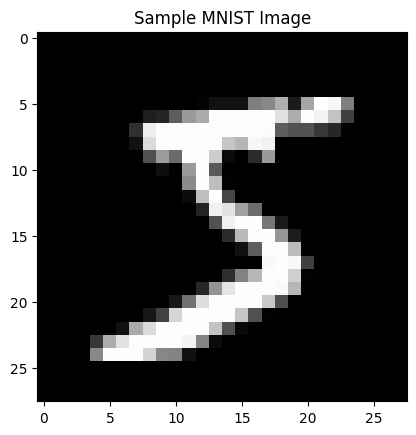

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title("Sample MNIST Image")
plt.show()

in the above code : 
- use keras to load the MNIST dataset
- normalize the image pixel values to the range [0, 1]
- flatten the 28x28 images to a 784 dimensional vector to reshape the data

## Building the Autoencoder Model

In [3]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Autoencoder

In [5]:
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2543 - val_loss: 0.1774
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1600 - val_loss: 0.1451
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1386 - val_loss: 0.1302
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1269 - val_loss: 0.1210
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1195 - val_loss: 0.1149
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1146 - val_loss: 0.1112
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1113 - val_loss: 0.1085
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1086 - val_loss: 0.1059
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1063 - val_loss: 0.1041
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1041 - val_loss: 0.1019
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1025 - val_loss: 0.1004
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

## Evaluating the Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


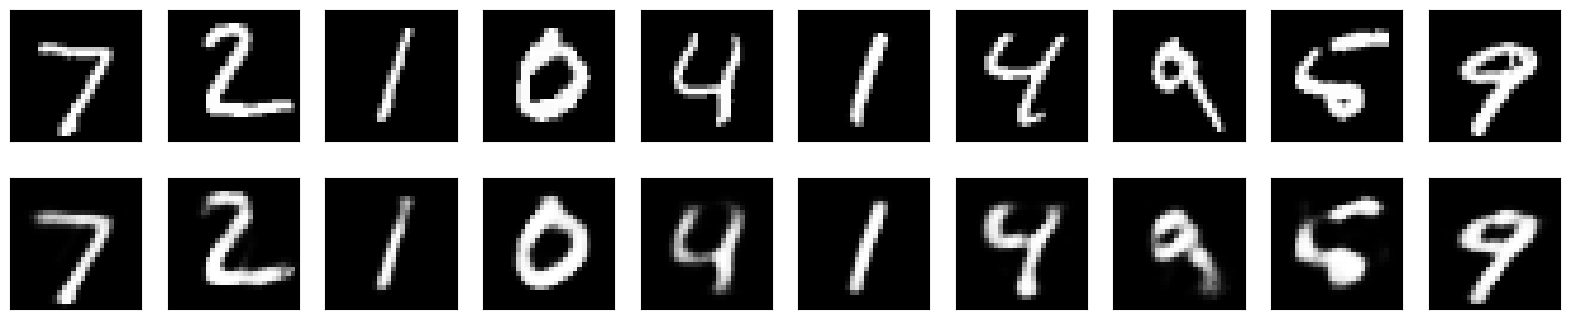

In [6]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


## Fine Tuning The Autoencoder

In [7]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False

In [8]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Layer 0: input_layer, Trainable: False
Layer 1: dense, Trainable: False
Layer 2: dense_1, Trainable: False
Layer 3: dense_2, Trainable: False
Layer 4: dense_3, Trainable: False


In [9]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0934 - val_loss: 0.0918
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0925 - val_loss: 0.0916
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0923 - val_loss: 0.0911
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0919 - val_loss: 0.0908
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0917 - val_loss: 0.0907
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0915 - val_loss: 0.0905
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0914 - val_loss: 0.0903
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0913 - val_loss: 0.0903


## Denoising Images with Autoencoder

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1720 - val_loss: 0.1436
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1395 - val_loss: 0.1341
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1329 - val_loss: 0.1301
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1296 - val_loss: 0.1276
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1277 - val_loss: 0.1260
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1261 - val_loss: 0.1246
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1250 - val_loss: 0.1240
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1241 - val_loss: 0.1231
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1235 - val_loss: 0.1227
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1231 - val_loss: 0.1223
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1228 - val_loss: 0.1222
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

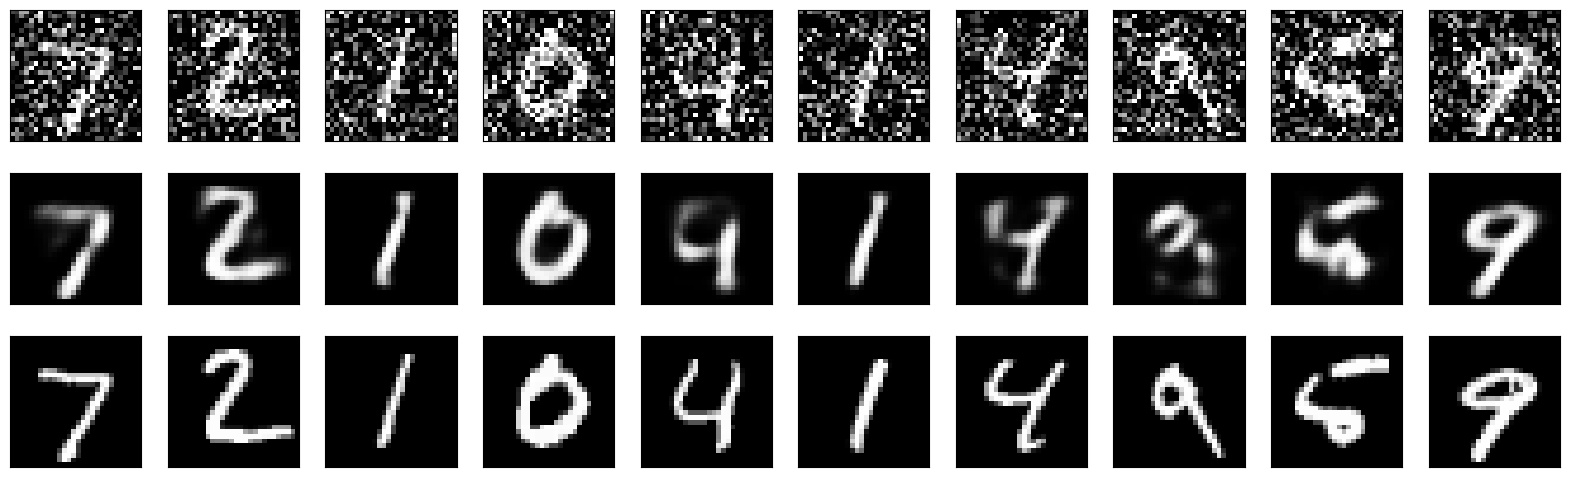

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
